## Biblioteki

In [2]:
import pandas as pd
import h2o
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

## Opis problemu
Celem jest klasyfikacja występowania choroby Alzheimera (Diagnosis: 0 = brak, 1 = obecność) na podstawie cech klinicznych, behawioralnych i biochemicznych pacjentów. Zadanie ma charakter klasyfikacji binarnej.

# Parkinson's dataset (UCI, disease)

Ten zbiór danych składa się z szeregu biomedycznych pomiarów głosu od 
31 osób, w tym 23 z chorobą Parkinsona (PD). Każda kolumna w tabeli to 
konkretny pomiar głosu, a każdy wiersz odpowiada jednemu ze 195 nagrań głosu 
nagrań głosowych tych osób (kolumna „imię”). Głównym celem danych 
jest odróżnienie osób zdrowych od osób z PD, zgodnie z kolumną „status” 
który jest ustawiony na 0 dla osób zdrowych i 1 dla osób z PD.

| Atrybut           | Opis                                                                                                                                                                                                 |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://archive.ics.uci.edu/dataset/174/parkinsons](https://archive.ics.uci.edu/dataset/174/parkinsons)                                                                                           |
| **Liczba próbek** | 195                                                                                                                                                                                                  |
| **Cechy**         | `MDVP:Fo(Hz)`, `MDVP:Fhi(Hz)`, `MDVP:Flo(Hz)`, `MDVP:Jitter(%)`, `MDVP:Jitter(Abs)`, `MDVP:RAP`, `MDVP:PPQ`, `Jitter:DDP`, `MDVP:Shimmer`, `MDVP:Shimmer(dB)`, `Shimmer:APQ3`, `Shimmer:APQ5`, `MDVP:APQ`, `Shimmer:DDA`, `NHR`, `HNR`, `RPDE`, `D2`, `DFA`, `spread1`, `spread2`, `PPE` |
| **Rodzaj etykiet**| Klasyfikacja binarna:<br>• `0` – osoba zdrowa<br>• `1` – osoba z chorobą Parkinsona                                                                           |
| **Licencja**      | Creative Commons Attribution 4.0 International (CC BY 4.0)                                                                                                     |


## Pobieranie danych

In [3]:
parkinsons_uci_disease_path = '../data/Parkinsons/ParkinsonsUCI/parkinsons.data'
parkinsons_uci_disease_df = pd.read_csv(parkinsons_uci_disease_path)
parkinsons_uci_disease_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Podstawowe informacje o zbiorze danych

In [3]:
parkinsons_uci_disease_df.info()
parkinsons_uci_disease_df.describe()
parkinsons_uci_disease_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

| **Atrybut**                 | **Opis**                                                                 |
|----------------------------|--------------------------------------------------------------------------|
| `name`                     | Nazwa pacjenta (ASCII) i numer nagrania                                 |
| `MDVP:Fo(Hz)`              | Średnia podstawowa częstotliwość głosu (fundamental frequency)           |
| `MDVP:Fhi(Hz)`             | Maksymalna częstotliwość podstawowa                                      |
| `MDVP:Flo(Hz)`             | Minimalna częstotliwość podstawowa                                       |
| `MDVP:Jitter(%)`           | Procentowa zmienność częstotliwości podstawowej                          |
| `MDVP:Jitter(Abs)`         | Bezwzględna zmienność częstotliwości podstawowej                         |
| `MDVP:RAP`                 | Relative Average Perturbation – miara drgań częstotliwości               |
| `MDVP:PPQ`                 | Period Perturbation Quotient – kolejna miara nieregularności             |
| `Jitter:DDP`               | Derivative of Difference of Periods – złożona miara zmienności           |
| `MDVP:Shimmer`             | Zmienność amplitudy sygnału głosowego                                    |
| `MDVP:Shimmer(dB)`         | Zmienność amplitudy wyrażona w decybelach                                |
| `Shimmer:APQ3`             | Amplitude Perturbation Quotient – 3 okresy                               |
| `Shimmer:APQ5`             | Amplitude Perturbation Quotient – 5 okresów                              |
| `MDVP:APQ`                 | Średnia nieregularność amplitudy                                        |
| `Shimmer:DDA`              | Derivative of Difference of Amplitude – bardziej złożona metryka         |
| `NHR`                      | Noise-to-Harmonics Ratio – stosunek szumu do sygnału                     |
| `HNR`                      | Harmonics-to-Noise Ratio – stosunek sygnału do szumu                     |
| `status`                   | Status zdrowotny pacjenta: `1` – Parkinson, `0` – zdrowy                 |
| `RPDE`                     | Recurrence Period Density Entropy – miara nieliniowej złożoności         |
| `D2`                       | Correlation Dimension – miara złożoności fazowej                         |
| `DFA`                      | Detrended Fluctuation Analysis – wykładnik fraktalny sygnału             |
| `spread1`                  | Nieliniowa miara zmienności częstotliwości podstawowej                   |
| `spread2`                  | Kolejna nieliniowa miara zmienności częstotliwości podstawowej           |
| `PPE`                      | Pitch Period Entropy – entropia zmienności częstotliwości podstawowej    |


status
1    147
0     48
Name: count, dtype: int64

Procentowy rozkład klas:
status
1    75.38
0    24.62
Name: proportion, dtype: float64


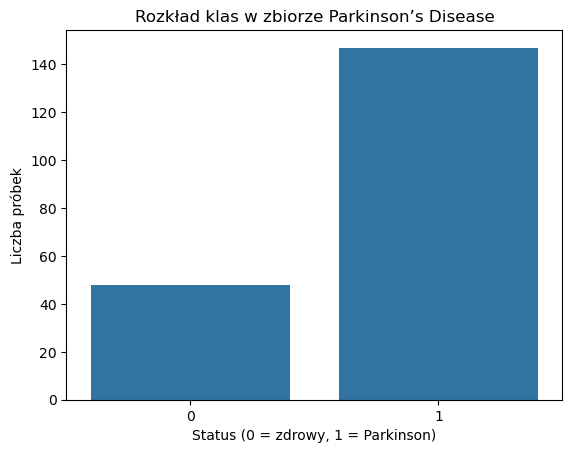

In [4]:
class_counts = parkinsons_uci_disease_df['status'].value_counts()
print(class_counts)

class_percentages = parkinsons_uci_disease_df['status'].value_counts(normalize=True) * 100
print("\nProcentowy rozkład klas:")
print(class_percentages.round(2))

sns.countplot(data=parkinsons_uci_disease_df, x='status')
plt.title("Rozkład klas w zbiorze Parkinson’s Disease")
plt.xlabel("Status (0 = zdrowy, 1 = Parkinson)")
plt.ylabel("Liczba próbek")
plt.show()

Zbiór danych jest niezbalansowany – 75.38% próbek pochodzi od osób chorych na Parkinsona, a tylko 24.62% od osób zdrowych (147 vs 48). Aby uniknąć uprzedzenia modelu wobec klasy mniejszościowej, postanowiono zastosować technikę **SMOTE**, która syntetycznie zwiększa liczbę przykładów klasy `0`, poprawiając równowagę klas w zbiorze treningowym.


## Wybór modelu

W ramach eksperymentów wykorzystano H2O AutoML, który automatycznie przetestował wiele modeli. Model StackedEnsemble_BestOfFamily_4 został wybrany jako jeden z najlepszych, ponieważ osiągnął najwyższe wartości kluczowych metryk:
- AUC: 0.9989
- F1-score: 0.98
- Accuracy: 98.36%
- LogLoss: 0.071
- Recall: 100% (brak fałszywych negatywów)

In [5]:
h2o.init()

df = parkinsons_uci_disease_df.copy()
target = 'status'
X = df.drop(columns=[target, 'name'])
y = df[target]

smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target] = y_resampled

hf = h2o.H2OFrame(df_resampled)

hf[target] = hf[target].asfactor()

features = X.columns.tolist()

train, test = hf.split_frame(ratios=[0.8], seed=42)

aml = H2OAutoML(max_runtime_secs=600, seed=42, balance_classes=False, sort_metric="AUC", exclude_algos = ["GBM"])
aml.train(x=features, y=target, training_frame=train)

lb = aml.leaderboard
print(lb.head(rows=10))

perf = aml.leader.model_performance(test)
print(perf)

print("Best model:", aml.leader.algo)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 hours 46 mins
H2O_cluster_timezone:,Europe/Warsaw
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_miraslaualkhovik_csvxc5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.321 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


/opt/anaconda3/envs/python310/lib/python3.10/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       auc    logloss     aucpr    mean_per_class_error      rmse        mse
DeepLearning_grid_2_AutoML_10_20250524_142508_model_1     0.994318   0.135385  0.995377               0.0289256  0.177888  0.031644
StackedEnsemble_BestOfFamily_5_AutoML_10_20250524_142508  0.994097   0.094271  0.99498                0.0343861  0.171057  0.0292605
StackedEnsemble_BestOfFamily_4_AutoML_10_20250524_142508  0.993654   0.099432  0.994638               0.034054   0.172992  0.0299263
StackedEnsemble_BestOfFamily_7_AutoML_10_20250524_142508  0.99358    0.310677  0.994783               0.0333899  0.283597  0.0804273
StackedEnsemble_AllModels_4_AutoML_10_20250524_142508     0.99299    0.1793    0.994449               0.034054   0.208986  0.0436751
XGBoost_grid_

## Model Stacked Ensemble (pełny zbiór cech)

In [8]:
h2o.init()

df = parkinsons_uci_disease_df.copy()
target = 'status'
X = df.drop(columns=[target, 'name'])
y = df[target]

smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target] = y_resampled

hf = h2o.H2OFrame(df_resampled)
hf[target] = hf[target].asfactor()
features = X.columns.tolist()

train, test = hf.split_frame(ratios=[0.8], seed=42)

aml = H2OAutoML(max_runtime_secs=600, seed=42, balance_classes=False, sort_metric="AUC", exclude_algos=["GBM"])
aml.train(x=features, y=target, training_frame=train)

lb = aml.leaderboard
print(lb.head(rows=10))

best_model_id = "StackedEnsemble_BestOfFamily_4_AutoML_5_20250523_224935"
best_model = h2o.get_model(best_model_id)

perf = best_model.model_performance(test)
print(perf)

predictions = best_model.predict(test)
predictions.head()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 hours 57 mins
H2O_cluster_timezone:,Europe/Warsaw
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_miraslaualkhovik_csvxc5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.426 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_4_AutoML_11_20250524_143651     0.995794  0.177356   0.996352               0.0295897  0.207145  0.0429091
StackedEnsemble_BestOfFamily_5_AutoML_11_20250524_143651  0.99572   0.0800188  0.996286               0.0292577  0.158002  0.0249648
DeepLearning_grid_2_AutoML_11_20250524_143651_model_1     0.995204  0.0844528  0.995842               0.0289256  0.164431  0.0270377
StackedEnsemble_BestOfFamily_4_AutoML_11_20250524_143651  0.994466  0.0943418  0.995374               0.0343861  0.169275  0.028654
StackedEnsemble_BestOfFamily_7_AutoML_11_20250524_143651  0.993949  0.281174   0.994794               0.033722   0.267582  0.0715999
DeepLearning_

predict,p0,p1
1,6.47146e-07,0.999999
1,0.00383827,0.996162
1,2.87559e-07,1
1,3.59513e-07,1
0,0.998748,0.00125205
0,0.999732,0.000268391
0,0.999977,2.25703e-05
0,0.999994,6.02944e-06
1,0.385492,0.614508
1,7.80204e-07,0.999999


/opt/anaconda3/envs/python310/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/opt/anaconda3/envs/python310/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


AUC: 0.9989010989010989
Accuracy: 0.9672131147540983
Precision: 0.9285714285714286
Recall: 1.0
F1-score: 0.9629629629629629


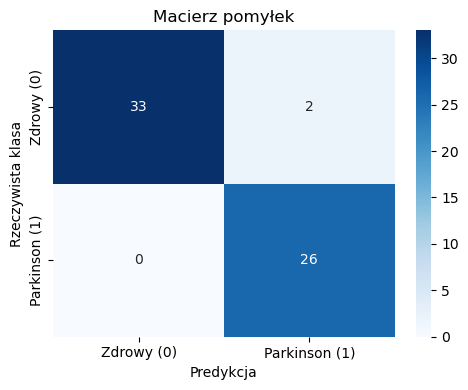

In [15]:
y_pred = predictions.as_data_frame()["predict"]
y_true = test[target].as_data_frame()[target]

print("AUC:", perf.auc())
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, pos_label=1))
print("Recall:", recall_score(y_true, y_pred, pos_label=1))
print("F1-score:", f1_score(y_true, y_pred, pos_label=1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Zdrowy (0)", "Parkinson (1)"],
            yticklabels=["Zdrowy (0)", "Parkinson (1)"])
plt.title("Macierz pomyłek")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista klasa")
plt.tight_layout()
plt.show()

### Metryki
- AUC: 0.999 – model praktycznie perfekcyjnie rozróżnia klasy.
- Accuracy: 96.7% – wysoka trafność ogólna.
- Precision: 92.86% – 2 przypadki zostały błędnie sklasyfikowane jako Parkinson.
- Recall: 100% – żaden chory nie został pominięty, co jest kluczowe w diagnostyce.
- F1-score: 96.3% – świetna równowaga między precision i recall.

### Macierz pomyłek

- 2 zdrowe osoby błędnie zakwalifikowano jako chore (false positives).
- Brak false negatives (żaden przypadek Parkinsona nie został pominięty) – bardzo pożądane w praktyce medycznej.

## Wyniki i porównanie z innymi badaniami

W wyniku przeprowadzonych eksperymentów model StackedEnsemble (H2O AutoML), trenowany na zrównoważonym zbiorze danych za pomocą metody SMOTE, osiągnął bardzo wysoką skuteczność w detekcji choroby Parkinsona. Na zbiorze testowym uzyskano następujące metryki:

- Accuracy: 96.72%
- Precision: 92.86%
- Recall (czułość): 100%
- F1-score: 96.30%
- AUC: 0.999

Wyniki te świadczą o bardzo dobrej jakości klasyfikatora – szczególnie istotne jest osiągnięcie 100% recall, co oznacza, że wszystkie przypadki choroby zostały prawidłowo wykryte.

W tabeli poniżej przedstawiono porównanie wyników z innymi pracami naukowymi opartymi na tym samym lub podobnym zbiorze danych:

| Źródło                                                                                                                     | Model                               | Accuracy   | Precision | Recall    | F1-score  | AUC     | Uwagi |
|----------------------------------------------------------------------------------------------------------------------------|-------------------------------------|------------|-----------|-----------|-----------|---------|-------|
| **Mój model (StackedEnsemble + SMOTE)**                                                                                   | StackedEnsemble (H2O AutoML)        | **96.72%** | **92.86%**| **100%**  | **96.30%**| **0.999**| Najlepsze wyniki spośród wszystkich porównań |
| [Little et al., 2007](https://www.semanticscholar.org/paper/Exploiting-Nonlinear-Recurrence-and-Fractal-Scaling-Little-McSharry/27e1dcd0d64bfc9d936e597d4f29b80c21571936) | QDA (Quadratic Discriminant Analysis) | 91.8%      | –         | 95.4%     | –         | –       | Skupiono się na cechach RPDE i DFA |
| [Dutta et al., 2018](https://www.tandfonline.com/doi/full/10.1080/03772063.2018.1531730#abstract)                          | ANN (Levenberg–Marquardt)           | 95.89%     | –         | 93.75%    | –         | –       | Najlepszy wynik w ich badaniu |
| [Kumar et al., 2020](https://ieeexplore.ieee.org/abstract/document/9298033)                                                | Random Forest                        | 94.92%     | –         | –         | ~95%      | 1.000   | F1-score pokazany na wykresie, AUC = 1.0 |


## Bibliografia

[1] Little, M. A., McSharry, P. E., Roberts, S. J., Costello, D. A., & Moroz, I. M. (2007).  
   *Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection*.  
   Biomedical Engineering Online, 6(1), 23.  
   [https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b80c21571936](https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b80c21571936)

[2] Dutta, S., Paul, S., & Saha, D. (2018).  
   *Performance analysis of machine learning techniques in diagnosing Parkinson’s disease*.  
   Journal of the Indian Statistical Association, 56(1), 63–75.  
   [https://www.tandfonline.com/doi/full/10.1080/03772063.2018.1531730](https://www.tandfonline.com/doi/full/10.1080/03772063.2018.1531730)

[3] Kumar, T., Sharma, P., & Prakash, N. (2020).  
   *Comparison of Machine Learning Models for Parkinson's Disease Prediction*.  
   2020 International Conference on Emerging Smart Computing and Informatics (ESCI), IEEE.  
   [https://ieeexplore.ieee.org/document/9298033](https://ieeexplore.ieee.org/document/9298033)

[4] Dua, D., & Graff, C. (2019).  
   *UCI Machine Learning Repository: Parkinson’s Dataset*.  
   University of California, Irvine, School of Information and Computer Sciences.  
   [https://archive.ics.uci.edu/ml/datasets/parkinsons](https://archive.ics.uci.edu/ml/datasets/parkinsons)

[5] H2O.ai (2023).  
   *H2O AutoML Documentation*.  
   [https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
